<font color=red size=6>**Estados Excitados**

<font color=red>**Prof. Enrique Mejía Ospino, emejia@uis.edu.co**

<font color=red>**Escuela de Química**
    
<font color=red>**Universidad Industrial de Santander** 

**<font color=blue> Vamos  atilizar el modulo *PSI4* para desarrollar algunos ejercicios de cálculo mecánico-cuántico. En este Cuaderno de Jupyter se muestra como obtener los estados excitados de sistemas moleculares, para ello se utilizará el método de cálculo *TDSCF* (HF dependiente del tiempo) y *TDDFT* (DFT dependiente del tiempo). Estos método son los más utilizados para el análisis de los estados excitados que permitirá predecir el espectro de absorción *UV-VIS* y espectros de *Fluorescencia*.  El análisis nos da las diferencias de energía entre el estado fundamental y los estados excitados y adicionalmente la probabilidad de transición como fuerza del oscilador (*oscillator strength*).** 

In [1]:
# Importamos los modulos =======================================================
import psi4
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from psi4.driver.procrouting.response.scf_response import tdscf_excitations
from psi4.driver.p4util import spectrum

**<font color=red> En este primer ejemplo vamos a determinar las curvas de potencial del del OH.** 

In [2]:
# Set up Psi4 ==========================================================

psi4.core.clean()
psi4.core.clean_options()
psi4.set_memory('2000 MB')  # Can make this much larger on Seawulf, each compute node has more than 100 GB RAM
psi4.set_num_threads(4)    # Can make this much larger on Seawulf, each compute node can support 28 threads.
                            # But it doesn't help much for small molecules...
psi4.core.set_output_file("./Data/h2o2_uv_vis.out")#psi4.core.set_output_file('./Data/PotentialScan.dat', False) #this command sets psi4's output to a file. Comment this line out if you want to see the output on the terminal.

In [3]:
h2o2 = psi4.geometry("""0 1
O        0.000000    0.695000   -0.092486
O       -0.000000   -0.695000   -0.092486
H       -0.388142    0.895249    0.739888
H        0.388142   -0.895249    0.739888
symmetry c1
""", name="H2O2")

psi4.set_options({
    'save_jk': True,
})

e, wfn = psi4.energy("HF/cc-pvdz", return_wfn=True, molecule=h2o2)
res2 = tdscf_excitations(wfn, states=10)
# get poles and residues to plot OPA and ECD spectra
poles2 = [r["EXCITATION ENERGY"] for r in res2]
opa_residues2 = [np.linalg.norm(r["ELECTRIC DIPOLE TRANSITION MOMENT (LEN)"])**2 for r in res2]

In [5]:
a=((3.21003616e-02)**2 + (9.16566431e-02)**2 + (4.54931508e-14)**2)
opa_residues2

[0.009431373448336404,
 5.2263072496185625e-06,
 0.016823522128855118,
 0.05744865257791574,
 0.3084941798740325,
 0.20444764439414886,
 0.004950002745628056,
 1.3560951986097771,
 0.22618469495053237,
 0.1330085107235495]

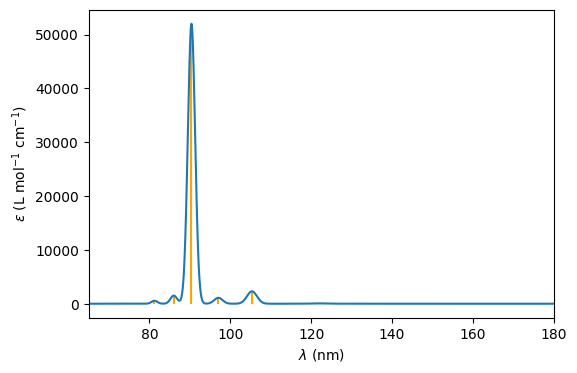

In [6]:
from psi4.driver.p4util import spectrum
import matplotlib.pyplot as plt
opa_spectrum2 = spectrum(poles=poles2, residues=opa_residues2, gamma=0.01, out_units="nm")
fig, ax = plt.subplots(figsize=(6,4))
ax.vlines(opa_spectrum2["sticks"]["poles"], ymin=0, ymax=opa_spectrum2["sticks"]["residues"], color="orange")
ax.plot(opa_spectrum2["convolution"]["x"], opa_spectrum2["convolution"]["y"])
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("$\epsilon$ (L mol$^{-1}$ cm$^{-1}$)")
ax.set_xlim(65, 180)
plt.savefig('./Imagenes/h2o2_uv_vis.jpg', dpi=200)
plt.show()

In [7]:
# Set up Psi4 ==========================================================

psi4.core.clean()
psi4.core.clean_options()
psi4.set_memory('2000 MB')  # Can make this much larger on Seawulf, each compute node has more than 100 GB RAM
psi4.set_num_threads(4)    # Can make this much larger on Seawulf, each compute node can support 28 threads.
                            # But it doesn't help much for small molecules...
psi4.core.set_output_file("./Data/methyloxirane_uv_vis.out")#psi4.core.set_output_file('./Data/PotentialScan.dat', False) #this command sets psi4's output to a file. Comment this line out if you want to see the output on the terminal.

In [8]:
moxy = psi4.geometry("""0 1
C  0.152133 -0.035800  0.485797
C -1.039475  0.615938 -0.061249
C  1.507144  0.097806 -0.148460
O -0.828215 -0.788248 -0.239431
H  0.153725 -0.249258  1.552136
H -1.863178  0.881921  0.593333
H -0.949807  1.214210 -0.962771
H  2.076806 -0.826189 -0.036671
H  2.074465  0.901788  0.325106
H  1.414895  0.315852 -1.212218
""", name="(S)-methyloxirane")

psi4.set_options({'save_jk': True,"reference": "rhf"})

e, wfn = psi4.energy("b3lyp/cc-pvdz", return_wfn=True, molecule=moxy)
res = tdscf_excitations(wfn, states=10, triplets="also")

# get poles and residues to plot OPA and ECD spectra
poles = [r["EXCITATION ENERGY"] for r in res]
opa_residues = [np.linalg.norm(r["ELECTRIC DIPOLE TRANSITION MOMENT (LEN)"])**2 for r in res]



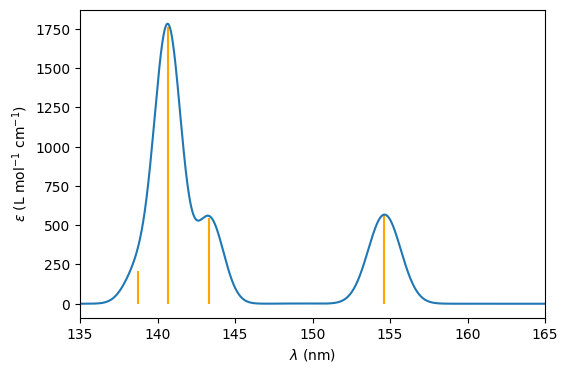

In [9]:
opa_spectrum = spectrum(poles=poles, residues=opa_residues, gamma=0.004, out_units="nm")
fig, ax = plt.subplots(figsize=(6,4))
ax.vlines(opa_spectrum["sticks"]["poles"], ymin=0, ymax=opa_spectrum["sticks"]["residues"], color="orange")
ax.plot(opa_spectrum["convolution"]["x"], opa_spectrum["convolution"]["y"])
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("$\epsilon$ (L mol$^{-1}$ cm$^{-1}$)")
ax.set_xlim(135, 165)
plt.savefig('./Imagenes/methyloxirane_uv_vis', dpi=200)
plt.show()